In [128]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import os

In [129]:

# plt.imshow(npimg)# how to process img into numpy using Pillow
image = Image.open('./dataset/covid/images/COVID-1.png')
npimg = np.asarray(image,dtype="int32")
npimg.shape
plt.show()

In [130]:
# How to process img into numpy using OpenCV
def ImageToArray(path):
    img_arr = cv2.imread(path)   # reads an image in the BGR format
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)   # BGR -> RGB
    return img_arr

In [131]:
curr_type = "normal"
testim = ImageToArray(f"./dataset/{curr_type}/images/NORMAL-1.png")/255
testim = testim[::2, ::2]


In [132]:
testim.shape

(150, 150, 3)

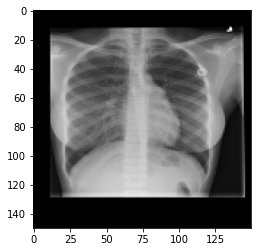

In [133]:
plt.imshow(testim)
plt.show()

In [134]:
labels= ['normal','covid','pneumonia']
X = []
names = [] # not used, but just for seeing the file names
y = []

In [135]:
for label in labels:
    for filename in os.listdir(f"./dataset/{label}/images/")[:1000]:
        arr = ImageToArray(f"./dataset/{label}/images/{filename}")/255 # dont run this yet with all cos it will crash # divide by 255 to normalise the data
        arr = arr[::2, ::2].tolist() # having issues with appending np array (it clears the array each time, so we conver to python list first and then make the whole thing a np array later
        label_index = labels.index(label)
        X.append(arr)
        y = np.append(y, label_index)
#         X = np.append(X, arr)
        names.append(filename)
#         print(filename, label_index) # yep it goes through all of them correctly

In [136]:
X = np.array(X)
y = np.array(y, dtype='int8')

In [137]:
X.shape

(3000, 150, 150, 3)

In [138]:
y.shape

(3000,)

In [103]:
# X[0]
# X.shape # X has right shape

# y[:5] # confirmed y is 1d arr


In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # split into train and test

In [141]:
X_train.shape, X_test.shape # looks good

((2400, 150, 150, 3), (600, 150, 150, 3))

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

In [143]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils

In [144]:
model = Sequential()
# Flattening the images from the 150x150 pixels to 1D 22500 pixels
size = X_train.shape[1] * X_train.shape[2] # train and test must have same sized data! dont know why they wouldnt though
X_train = X_train.reshape(X_train.shape[0], size)
X_test = X_test.reshape(X_test.shape[0], size)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


# one-hot encoding using keras' numpy-related utilities
n_classes = 3
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(9, input_shape=(22500,), activation='relu'))
# output layer
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

ValueError: cannot reshape array of size 162000000 into shape (2400,22500)

In [117]:
model = Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(150,150,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [118]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 146, 146, 30)      8670      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 73, 73, 30)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 71, 71, 30)        8130      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 35, 35, 30)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 33, 33, 30)       

In [119]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=32, 
    validation_data=(X_test,y_test)
)

Epoch 1/50
5/5 [==============================] - 34s 280ms/step - loss: 0.0000e+00 - acc: 0.3250 - val_loss: 0.0000e+00 - val_acc: 0.3667
Epoch 2/50
5/5 [==============================] - 0s 69ms/step - loss: 0.0000e+00 - acc: 0.3250 - val_loss: 0.0000e+00 - val_acc: 0.3667
Epoch 3/50
5/5 [==============================] - 0s 64ms/step - loss: 0.0000e+00 - acc: 0.3250 - val_loss: 0.0000e+00 - val_acc: 0.3667
Epoch 4/50
5/5 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - acc: 0.3250 - val_loss: 0.0000e+00 - val_acc: 0.3667
Epoch 5/50
5/5 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - acc: 0.3250 - val_loss: 0.0000e+00 - val_acc: 0.3667
Epoch 6/50
5/5 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - acc: 0.3250 - val_loss: 0.0000e+00 - val_acc: 0.3667
Epoch 7/50
5/5 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - acc: 0.3250 - val_loss: 0.0000e+00 - val_acc: 0.3667
Epoch 8/50
5/5 [=======================

In [120]:
evaluate = model.evaluate(X_test,y_test)
print(evaluate)

2/2 [==============================] - 0s 122ms/step - loss: 0.0000e+00 - acc: 0.3667
[0.0, 0.36666667461395264]


In [ ]:
checkImage = test_images[0:1]
checklabel = test_labels[0:1]

predict = model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

In [ ]:
from tensorflow.keras import datasets
(X_train, y_train),(X_test, y_test)=datasets.cifar10.load_data()

In [ ]:
X_train, X_test = X_train/255, X_test/255

In [ ]:
 X_train[0] # X_train is just a collection of all the np arrays of each image
y_train[0] # y_train just has all the labels for image of corresponding index

In [ ]:
plt.imshow(X_train[0])
